In [82]:
import os
import numpy
from matplotlib import pyplot as plt
import sys
import pandas as pd
import csv
from mpl_toolkits.mplot3d import Axes3D
import scipy as scipy
#sys.path.insert(0, r'/Users/nenetto/Dev/BiiGTK/src/PythonTools')
%matplotlib inline

In [218]:
def correctAngles(x,y,z):
    
    
    # Find maximum range
    rangeX = numpy.max(x)-numpy.min(x)
    rangeY = numpy.max(x)-numpy.min(x)
    rangeZ = numpy.max(x)-numpy.min(x)
    
    if (rangeX > 190) | (rangeY > 190) | (rangeZ > 190):
    


        dvx = numpy.diff(x)
        dvx = numpy.concatenate(([0.0],dvx),0)
        thresholdx = numpy.median(dvx) + 5 * numpy.std(dvx)
        dvx = numpy.abs(dvx)

        dvy = numpy.diff(y)
        dvy = numpy.concatenate(([0.0],dvy),0)
        thresholdy = numpy.median(dvy) + 5 * numpy.std(dvy)
        dvy = numpy.abs(dvy)

        dvz = numpy.diff(z)
        dvz = numpy.concatenate(([0.0],dvz),0)
        thresholdz = numpy.median(dvz) + 5 * numpy.std(dvz)
        dvz = numpy.abs(dvz)


        threshold = numpy.max(numpy.array([thresholdx, thresholdy, thresholdz]))

        signx = 1
        signy = 1
        signz = 1


        cx = numpy.copy(x)
        cy = numpy.copy(y)
        cz = numpy.copy(z)


        for i in range(len(x)):

            if dvx[i] > threshold:
                signx = signx * (-1)

            if dvy[i] > threshold:
                signy = signz * (-1)

            if dvz[i] > threshold:
                signz = signz * (-1)


            if signx == (-1):
                cx[i] = x[i] + 360

            if signy == (-1):
                cy[i] = y[i] + 360

            if signz == (-1):
                cz[i] = z[i] + 360
    else:
        cx = x
        cy = y
        cz = z

    return cx,cy,cz

def addFakeBoundingBox(ax,X,Y,Z):
    # Create cubic bounding box to simulate equal aspect ratio
    max_range = numpy.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*numpy.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
    Yb = 0.5*max_range*numpy.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
    Zb = 0.5*max_range*numpy.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')
    
    
    
def correctAngleOutput(x):
    
    
    # Find maximum range
    rangeX = numpy.max(x)-numpy.min(x)
    
    if (rangeX > 190):
    


        dvx = numpy.diff(x)
        dvx = numpy.concatenate(([0.0],dvx),0)
        thresholdx = numpy.median(dvx) + 5 * numpy.std(dvx)
        dvx = numpy.abs(dvx)


        threshold = thresholdx

        signx = 1


        cx = numpy.copy(x)


        for i in range(len(x)):

            if dvx[i] > threshold:
                signx = signx * (-1)


            if signx == (-1):
                cx[i] = x[i] + 360
    else:
        cx = x

    return cx

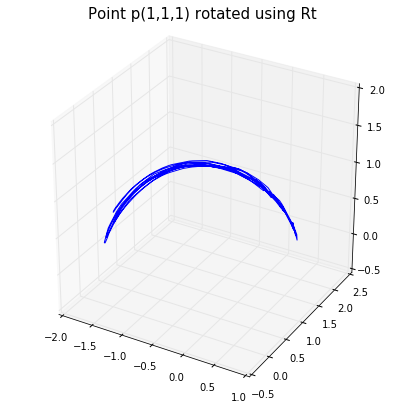

In [273]:
rotation_file1 = '/Users/nenetto/Trabajo/AlgiaCervical/Test3Movements/PruebaDavid_Rotation_2016-01-22_12-54-23.csv'
rotation_file2 = '/Users/nenetto/Trabajo/AlgiaCervical/Test3Movements/PruebaDavid_FlexExt_2016-01-22_12-53-37.csv'
rotation_file3 = '/Users/nenetto/Trabajo/AlgiaCervical/Test3Movements/PruebaDavid_FlexLat_2016-01-22_12-54-04.csv'

rotation_file4 = '/Users/nenetto/Trabajo/AlgiaCervical/Test3Movements/sdfsd_FlexExt_2016-01-22_18-56-22.csv'

# Read by rows
import csv
csvfile = open(rotation_file4, 'rb')
spamreader = csv.reader(csvfile, delimiter=',')

names = list()
time = list()
R_csv = list()
Rt = numpy.eye(3)

names = spamreader.next()

for row in spamreader:
    timeV = float(row[0])
    Rt[0,0] = float(row[1])
    Rt[0,1] = float(row[2])
    Rt[0,2] = float(row[3])
    Rt[1,0] = float(row[4])
    Rt[1,1] = float(row[5])
    Rt[1,2] = float(row[6])
    Rt[2,0] = float(row[7])
    Rt[2,1] = float(row[8])
    Rt[2,2] = float(row[9])
  
    time.append(timeV)
    R_csv.append(Rt.copy())
    
    
R_csv = numpy.array(R_csv)    

# Number of points
time = numpy.array(time)
N = len(time)

# Build R(t) con los ángulos

Rt = numpy.zeros((3,3,N))
for i in range(N):
    Rt[:,:,i] = R_csv[i,:,:]
    
   
# p = [1,1,1]
p = numpy.array([1.0,1.0,1.0])

# Rotate p using Rt
Pt = numpy.zeros((N,3))
for i in range(N):
    Pt[i,:] = numpy.dot(Rt[:,:,i],p)
    


    
# Draw results of p moved

X = Pt[:,0]
Y = Pt[:,1]
Z = Pt[:,2]

import mpl_toolkits.mplot3d

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot(X,Y,Z, color = 'b', lw = '1.0')
addFakeBoundingBox(ax1,X,Y,Z) # Axis Equal
ax1.set_title('Point p(1,1,1) rotated using Rt\n', fontsize=15);
    


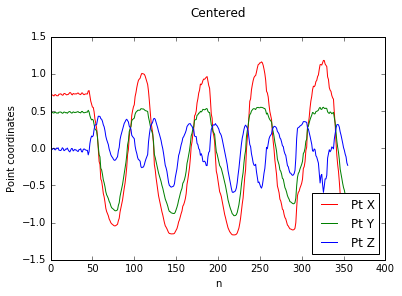

CovMatrix  (3, 3)
U
[[-0.84485346  0.14057251  0.51619957]
 [-0.53492798 -0.20637366 -0.81930579]
 [-0.00864188 -0.96832292  0.24955167]]
Vt
[[-0.84485346 -0.53492798 -0.00864188]
 [ 0.14057251 -0.20637366 -0.96832292]
 [ 0.51619957 -0.81930579  0.24955167]]
S
[ 309.33356445   24.27181758    0.81530167]
Cov
[[ 221.49217265  138.74995008   -0.94036149]
 [ 138.74995008   90.0961833     6.11367761]
 [  -0.94036149    6.11367761   22.83232776]]
SVD product
[[ 221.49217265  138.74995008   -0.94036149]
 [ 138.74995008   90.0961833     6.11367761]
 [  -0.94036149    6.11367761   22.83232776]]
R * Rt
[[  1.00000000e+00   8.67361738e-18   2.09467860e-16]
 [  8.67361738e-18   1.00000000e+00  -2.77555756e-17]
 [  2.09467860e-16  -2.77555756e-17   1.00000000e+00]]
Center:  -0.000691922739552 0.00126714319965
Radius: 1.45847025466


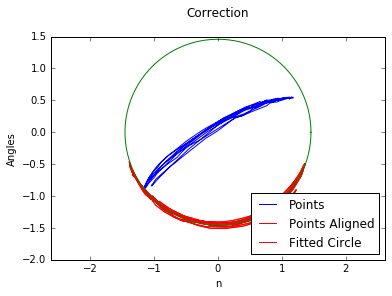

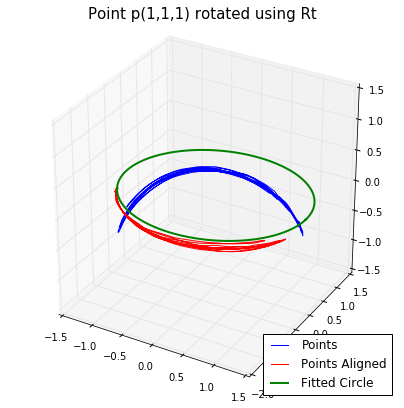

In [289]:
# Creation of X (Matriz de Covarianza)

## Resto el centroide de los datos
Ptmean = numpy.mean(Pt,axis = 0)

Ptcentered = Pt.copy()
for i in range(N):
    Ptcentered[i,:] -= Ptmean

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Ptcentered[:,0],'r')
ax.plot(Ptcentered[:,1],'g')
ax.plot(Ptcentered[:,2],'b')
ax.legend(['Pt X',\
           'Pt Y',\
           'Pt Z'], loc = 4)
ax.set_xlabel('n')
ax.set_ylabel('Point coordinates')
ax.set_title('Centered\n')
plt.show()

# Covariance
CovMatrix = numpy.dot(Ptcentered.T,Ptcentered)
print "CovMatrix ", CovMatrix.shape


# SVD
U, S, Vt = numpy.linalg.svd(CovMatrix, full_matrices = True)
print "U"
print U
print "Vt"
print Vt
print "S"
print S

print "Cov"
print CovMatrix
print "SVD product"
print numpy.dot(U,numpy.dot(numpy.diag(S),Vt))

# Matriz de Rotación de ejes A(plano donde quiero las medidas) -> B(Plano donde tomo las medidas)
R = Vt

# Comprobaciones
print "R * Rt"
print numpy.dot(R,R.T)

Rinverted = R.T.copy()


# Transform points 
PtcenteredRotatedBack = Pt.copy()
PtcenteredRotatedBack = numpy.dot(R,Pt.T).T 


# Ajustar a una circunferencia
from scipy.optimize import minimize
xv = PtcenteredRotatedBack[:,0]
yv = PtcenteredRotatedBack[:,1]


from scipy import  odr
def circfit(xs, ys):
    def fitEllipse(x,y):
        x = x[:,numpy.newaxis]
        y = y[:,numpy.newaxis]
        D =  numpy.hstack((x*x, x*y, y*y, x, y, numpy.ones_like(x)))
        S = numpy.dot(D.T,D)
        C = numpy.zeros([6,6])
        C[0,2] = C[2,0] = 2; C[1,1] = -1
        E, V =  numpy.linalg.eig(numpy.dot(numpy.linalg.inv(S), C))
        n = numpy.argmax(numpy.abs(E))
        a = V[:,n]
        return a
    
    def ellipse_center(a):
        b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
        num = b*b-a*c
        x0=(c*d-b*f)/num
        y0=(a*f-b*d)/num
        return numpy.array([x0,y0])

    def ellipse_axis_length( a ):
        b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
        up = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
        down1=(b*b-a*c)*( (c-a)*numpy.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
        down2=(b*b-a*c)*( (a-c)*numpy.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
        res1=numpy.sqrt(up/down1)
        res2=numpy.sqrt(up/down2)
        return numpy.array([res1, res2])
    

    a = fitEllipse(xs,ys)
    xc_3, yc_3 = ellipse_center(a)
    
    R = ellipse_axis_length( a )
    
    R_3 = numpy.mean(R)
    return xc_3, yc_3, R_3


def circfit2(x,y):

    N = len(x)
    xx = x**2
    yy = y**2
    xy = x*y
    
    A = numpy.zeros((3,3))
    A[0,0] = numpy.sum(x)
    A[0,1] = numpy.sum(y)
    A[0,2] = N
    
    A[1,0] = numpy.sum(xy)
    A[1,1] = numpy.sum(yy)
    A[1,2] = numpy.sum(y)
    
    A[2,0] = numpy.sum(xx)
    A[2,1] = numpy.sum(xy)
    A[2,2] = numpy.sum(x)
    
    B = numpy.array([-numpy.sum(xx+yy) , -numpy.sum(xx*y+yy*y) , -numpy.sum(xx*x+xy*y)])

    a = numpy.linalg.solve(A,B)
    
    xc = -.5*a[0]
    yc = -.5*a[1]
    R = numpy.sqrt((a[0]**2+a[1]**2)/4.0-a[2])

    return xc,yc,R



xc, yc, r = circfit2(xv,yv)
print "Center: ", xc, yc
print "Radius:", r

# Center the points in (0,0,0)
# Recentered
for i in range(N):
    PtcenteredRotatedBack[i,:] += numpy.array([-xc,-yc,Ptmean[2]])





def createCircle(alphaN, cx,cy,r):

    circle = numpy.zeros((3,alphaN))
    alphaVector = numpy.linspace(0,2 * numpy.pi, alphaN)

    for i in range(alphaN):
        circle[0,i] = cx + r * numpy.cos(alphaVector[i])
        circle[1,i] = cy + r * numpy.sin(alphaVector[i])
        circle[2,i] = 0.0

    return circle.T

circle = createCircle(100, 0.0,0.0,r)






fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Ptcentered[:,0],Ptcentered[:,1],'b')
ax.plot(PtcenteredRotatedBack[:,0],PtcenteredRotatedBack[:,1],'r')
ax.plot(xv,yv,'r')
ax.plot(circle[:,0],circle[:,1],'g')
ax.legend(['Points','Points Aligned', 'Fitted Circle'], loc = 4)
ax.axis('equal')
ax.set_xlabel('n')
ax.set_ylabel('Angles')
ax.set_title('Correction\n')
plt.show()





# Print rotated data

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(Ptcentered[:,0],Ptcentered[:,1],Ptcentered[:,2],'b')
ax1.plot(PtcenteredRotatedBack[:,0],PtcenteredRotatedBack[:,1],PtcenteredRotatedBack[:,2],'r')
ax1.plot(circle[:,0],circle[:,1],0.0, color = 'g', lw = '2.0')
addFakeBoundingBox(ax1,Ptcentered[:,0],Ptcentered[:,1],Ptcentered[:,2]) # Axis Equal
ax1.legend(['Points','Points Aligned', 'Fitted Circle'], loc = 4)
ax1.set_title('Point p(1,1,1) rotated using Rt\n', fontsize=15);







0 -> [ 3.]
[ 3.] -> [ 2.]
[ 2.] -> [ 3.]
[ 3.] -> [ 2.]
[ 2.] -> [ 3.]
[ 3.] -> [ 2.]
[ 2.] -> [ 3.]
[ 3.] -> [ 2.]
[ 2.] -> [ 3.]
[ 3.] -> [ 2.]


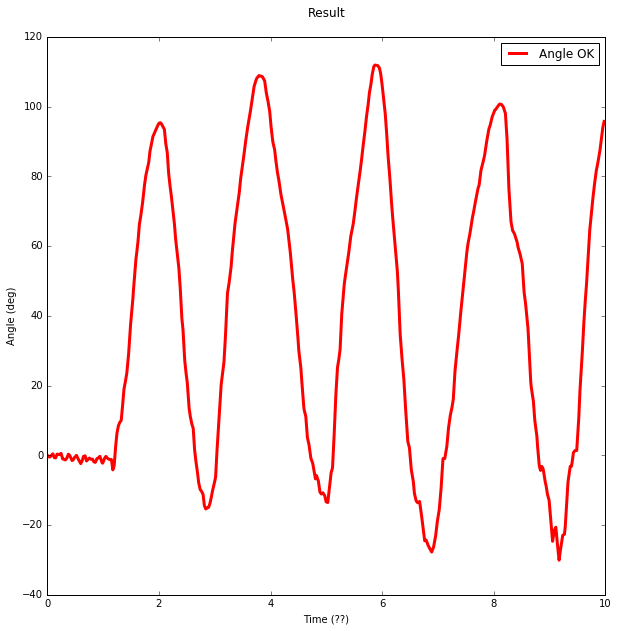

Rinverted
[[-0.84485346  0.14057251  0.51619957]
 [-0.53492798 -0.20637366 -0.81930579]
 [-0.00864188 -0.96832292  0.24955167]]
Range: 141.982787429


In [290]:
xunitary = numpy.array([1.0,0.0,0.0])


Pt2 = PtcenteredRotatedBack.copy()
Pt2[:,2] = 0.0 * Pt2[:,2]


modulesPt = numpy.zeros((N,1))
for i in range(N):
    modulesPt[i] = numpy.linalg.norm(Pt2[i,:])
    
angleFinalX = numpy.zeros((N,1))
angleProyected = numpy.zeros((N,1))
zone = numpy.zeros((N,1))

cte = 0.0
angPrev = 0
sign = 1
for i in range(N):
    angleFinalX[i] = numpy.rad2deg(numpy.arctan2(Pt2[i,1],Pt2[i,0]))
    angleProyected[i] = numpy.rad2deg(numpy.arctan2(Pt2[i,0],Pt2[i,1]))
    
    if Pt2[i,0]>0 and Pt2[i,1]>0: # x>0 & y>0 (1)
        zone[i] = 1
    elif Pt2[i,0]>0 and Pt2[i,1]<0: # x>0 & y<0 (2)
        zone[i] = 2
    elif Pt2[i,0]<0 and Pt2[i,1]<0: # x<0 & y<0 (3)
        zone[i] = 3
    else: #(4)
        zone[i] = 4


    
angleFinalX = angleFinalX - angleFinalX[0] 
        
        
        
state = False
prevZone = 0
for i in range(N):
    
    if prevZone != zone[i]:
        print prevZone, "->", zone[i]
    
    
    if (prevZone == 4) and (zone[i] == 3): # Go from 4 to 3
        
        typeS = 1
        if state:
            #print "Out 4 -> 3", time[i]
            state = False
        else:
            state = True
            print "Into 4 -> 3", time[i], state
            
    if (prevZone == 3) and (zone[i] == 4): # Go from 3 to 4
        
        typeS = 2
        if state:
            print "Out 3 -> 4", time[i]
            state = False
        else:
            #print "Into 3 -> 4", time[i]
            state = True
            
    if (prevZone == 3) or (zone[i] == 4):
        if state:
            if typeS == 1:
                #angleFinalX[i] = 360 - angleFinalX[i]
                #print "     360 - a"
                pass
            if typeS == 2:
                #angleFinalX[i] = -360  + angleFinalX[i]
                #print "     a - 360"
                pass
    else:
        pass#state = False
        
    prevZone = zone[i]
    








fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(time, angleFinalX,'r', lw = 3)
#ax.plot(time, A[:,2]- A[0,2],'g',ls = ':')
#ax.plot(time, angleProyected, 'b', lw = 3)
ax.legend(['Angle OK', 'Angles Acquired', 'Angles Proyected'])
#ax.scatter(time, angleFinalX,c=zone, s = 100)
#ax.scatter(time, zone*(numpy.max(angleFinalX)-numpy.min(angleFinalX)) , c = zone)
ax.set_xlabel('Time (??)')
ax.set_ylabel('Angle (deg)')
ax.set_title('Result\n')
plt.show()



print "Rinverted"
print Rinverted

print "Range:", numpy.max(angleFinalX) - numpy.min(angleFinalX)
